## Introducción

**PREDICCIÓN DE TIPO DE PERSONALIDAD DE UNA PERSONA**

El concepto de las "16 personalidades" proviene del indicador de tipo Myers-Briggs (MBTI), que es una teoría fue desarrollada por Isabel Briggs Myers y su madre, Katharine Cook Briggs, basada en las teorías del psiquiatra Carl Jung. Este modelo clasifica la personalidad en 16 tipos distintos, que resultan de combinar cuatro pares de preferencias:

Extraversión (E) - Introversión (I): Indica dónde las personas obtienen su energía: de la interacción con el mundo externo (E) o del mundo interno de ideas y reflexiones (I).

Sensación (S) - Intuición (N): Describe cómo las personas procesan información. Los tipos "S" se centran en detalles concretos y realidades prácticas, mientras que los tipos "N" se enfocan en patrones y posibilidades futuras.

Pensamiento (T) - Sentimiento (F): Define cómo las personas toman decisiones. Los "T" prefieren decisiones lógicas y objetivas, mientras que los "F" priorizan valores y consideraciones personales.

Juicio (J) - Percepción (P): Indica cómo las personas manejan el mundo externo: con estructura y planificación (J) o de manera abierta y flexible (P).

Cada tipo de personalidad es representado por una combinación de estas cuatro letras (por ejemplo, INTJ, ENFP, ESTJ), dando un total de 16 combinaciones posibles. (Luego se comprueba en el dataset).

El MBTI se usa en diferentes ámbitos, como en desarrollo personal, orientación vocacional y en el ámbito laboral para mejorar la dinámica de equipo.


**INFORMACIÓN IMPORTANTE**

En este archivo divido el código en celdas para posteriormente explicar cada paso que hago, es decir, la explicación de cada celda va DESPUÉS de la misma.

## Imports

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, labs, theme_void
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pickle
import gradio as gr
from imblearn.over_sampling import SMOTE

/Users/albertoyesaresmartinez/VSCode Projects/astral/proyecto_final_alberto_yesares/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Visualización e Interpretación de Datos

In [7]:
ruta_archivo = "data/data.csv"
df = pd.read_csv(ruta_archivo)

In [8]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


Viendo el dataset, podemos observar que las columnas son: Edad, Género, Educación, Grado de Introversión, Grado de Sensibilidad, Grado de Pensamiento Crítico , Grado de Juicio, Intereses y Personalidad, que es la variable objetivo. 

In [4]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB
None
                 Age      Education  Introversion Score  Sensing Score  \
count  128061.000000  128061.000000       128061.000000  128061.000000   
mean       26.349091       0.411156            4.996387       5.081893   
std         4.908022       0.492045            2.88

Un poco de información general del Dataset. Se aprecia que las edadesvan desde los 18 hasta los 57 y que las puntuaciones de personalidad van desde 0 hasta 10. 

In [5]:
conteo_personalidad = df['Personality'].value_counts()

In [6]:
print(f"Hay {len(conteo_personalidad)} tipos de valores únicos en 'Personality'.")


Hay 16 tipos de valores únicos en 'Personality'.


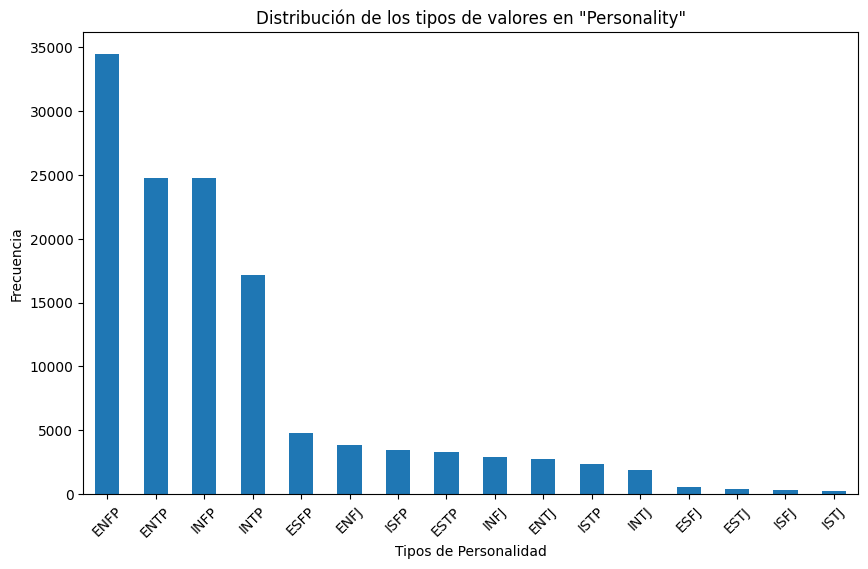

In [7]:
plt.figure(figsize=(10, 6))
conteo_personalidad.plot(kind='bar')
plt.title('Distribución de los tipos de valores en "Personality"')
plt.xlabel('Tipos de Personalidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Al consultar cuántos tipos de personalidades hay en el Dataset, se puede observar que hay 16, que coincide con las 16 personalidades propuestas por la teoría de personalidad MBTI.

In [8]:
print(df.isnull().sum())

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64


Aunque en la información general se aprecia que en el df no hay valores nulos, lo confirmamos con este comando.

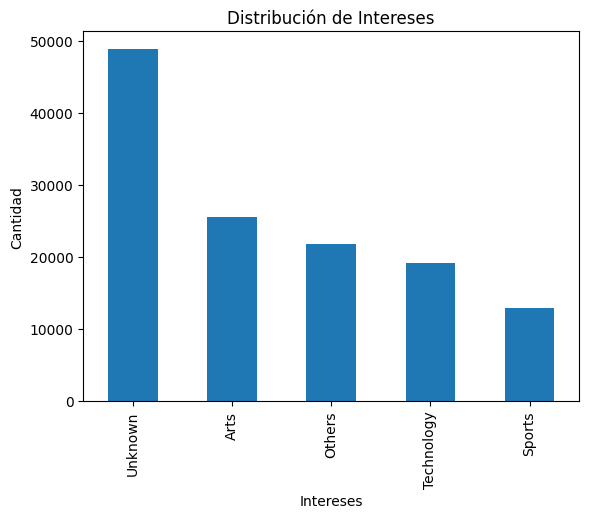

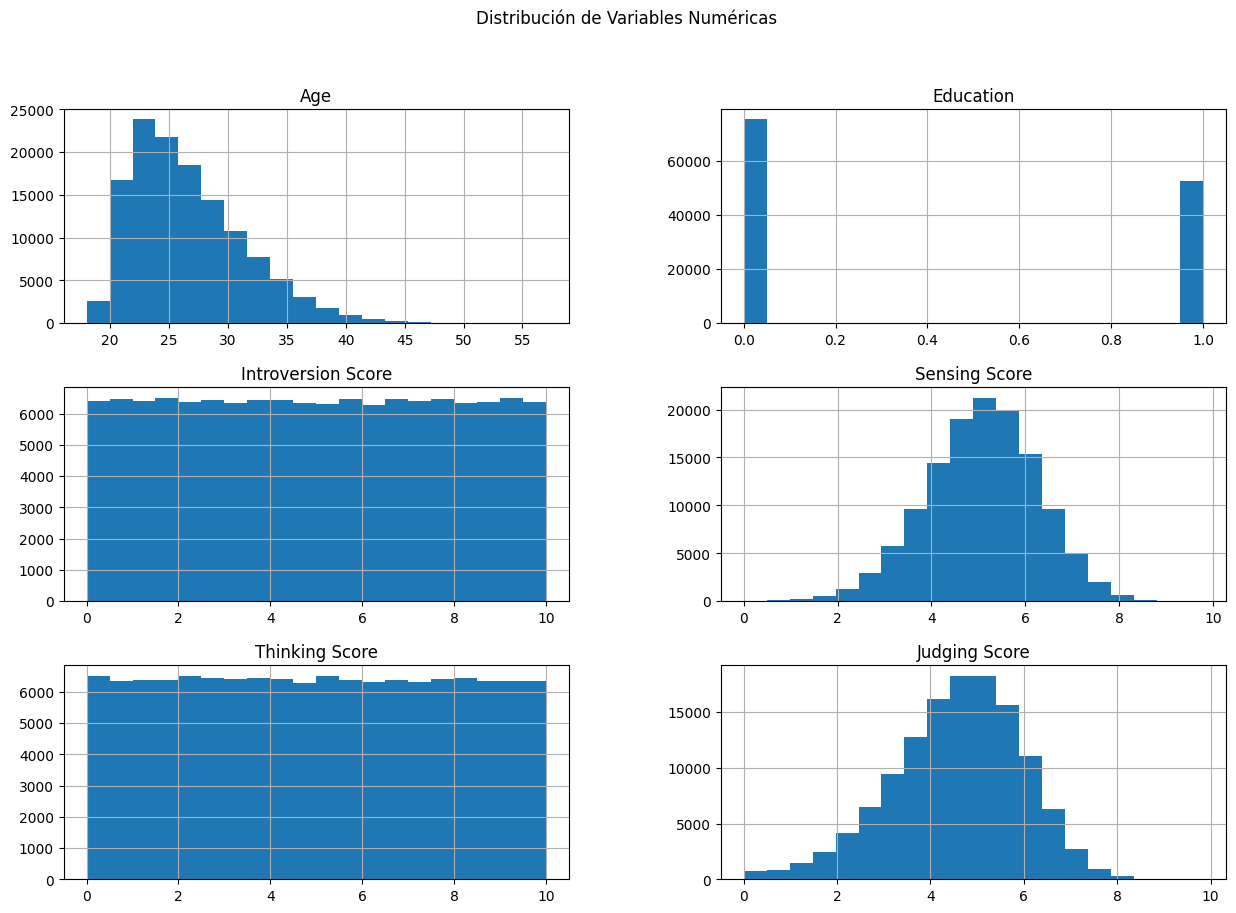

In [9]:

# Distribución de 'Interest'
df['Interest'].value_counts().plot(kind='bar', title='Distribución de Intereses')
plt.xlabel('Intereses')
plt.ylabel('Cantidad')
plt.show()

# Histograma para cada variable numérica
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()



He graficado todas las variables para analizar los datos y la tendencia de cada una. 

- Edad: Como se aprecia en el gráfico, claramente el intervalo donde hay más muestras está entre los 20 y los 30 años.
- Educación: Solo hay 1 y 0. Según he leido en la información del DataSet. 1 representa "Tiene eduación superior" y 0 "No la tiene".
- En Introversion y Thinking Score, los datos se reparten prácticamente igual entre 0 y 10.
- Sin embargo, en Sensing y Judging Score, se aprecia que la tencendia es al 5, es decir, al punto medio.

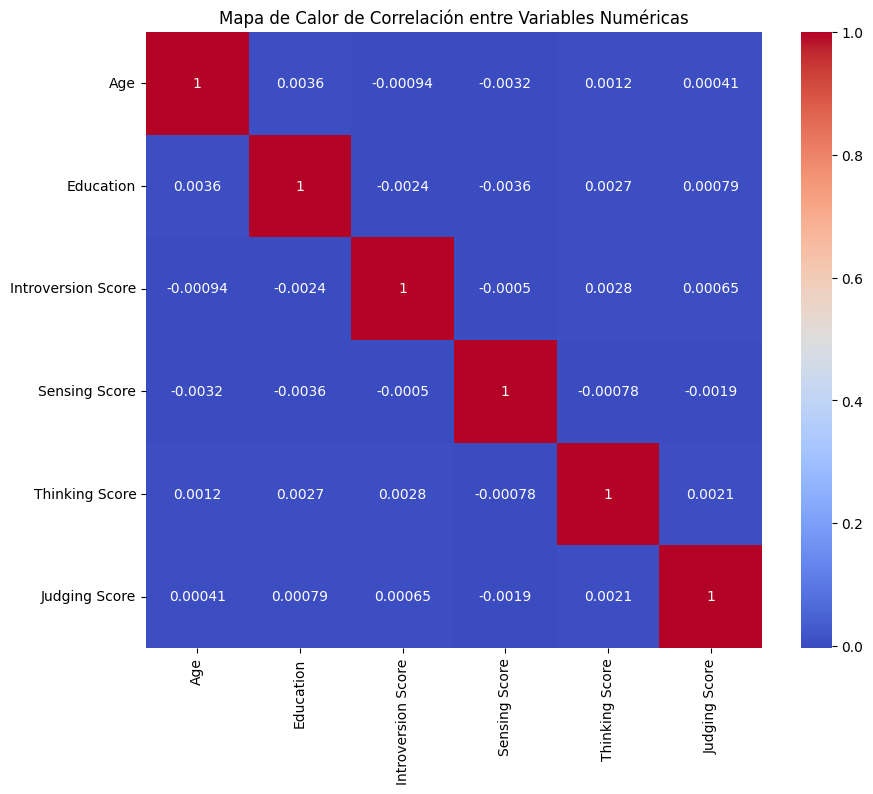

In [10]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


Al representarlo con el mapa de calor, nos damos cuenta de algo bastante interesante, y es que este sugiere que las variables numéricas son en su mayoría independientes entre sí.

In [11]:
interest_counts = df['Interest'].value_counts()
print(interest_counts)

Interest
Unknown       48835
Arts          25489
Others        21733
Technology    19103
Sports        12901
Name: count, dtype: int64


Al graficar la variable de 'Interest', he observado que solo ha mostrado 5, por lo que me ha hecho deducir que solo hay 5 posibles intereses y, efectivamente, solo hay 5.

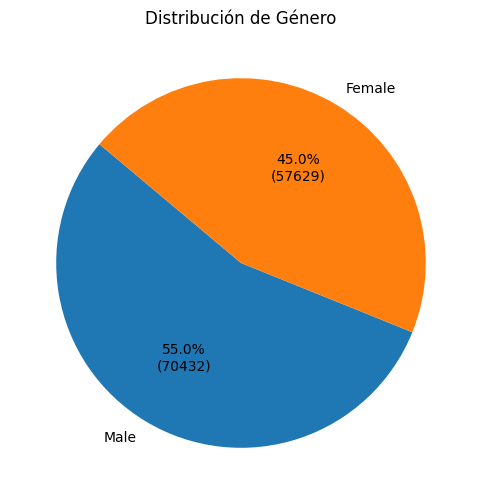

In [12]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))

def autopct_format(pct, total):
    absolute = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({absolute})"

# Gráfico de quesitos
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct=lambda pct: autopct_format(pct, gender_counts.sum()),
    startangle=140
)
plt.title("Distribución de Género")
plt.show()

El reparto entre géneros es bastante equitativo, como podemos observar, aunque se ve que hay más hombres que mujeres

## Procesamiento de Datos

HABIENDO VISUALIZADO E INTERPRETADO TODOS LOS DATOS DEL DATAFRAME, LOS EMPIEZO A **NORMALIZAR** Y A **CODIFICAR** PARA EL POSTERIOR ENTRENAMIENTO DEL MODELO. 

In [13]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Codificación de "Gender": He convertido "Male" en 0 y "Female" en 1

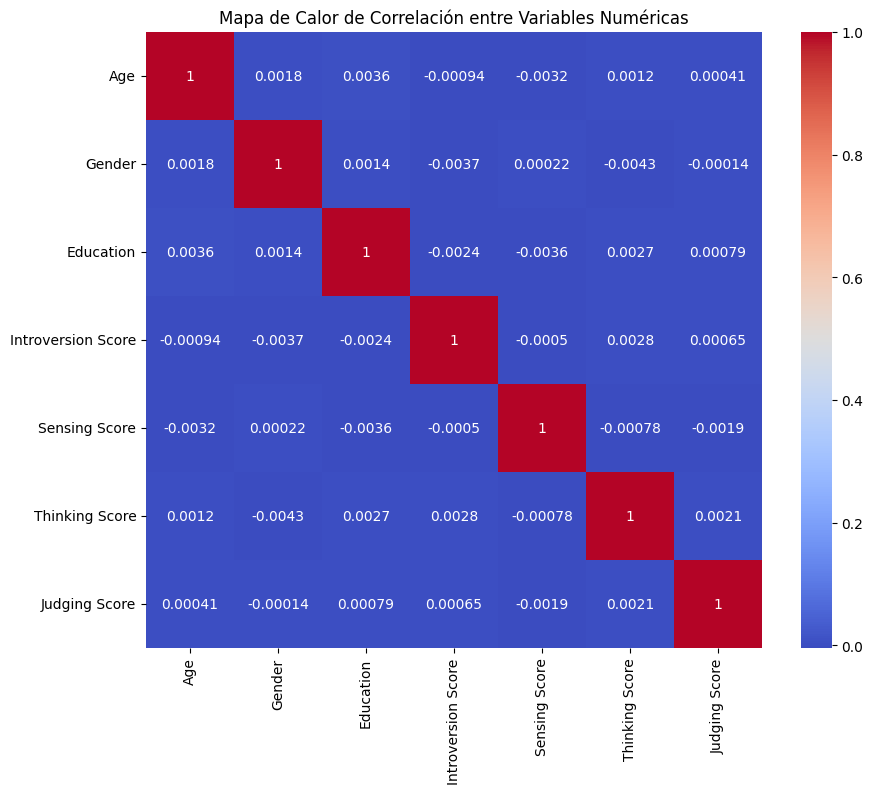

In [14]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

Al representarlo con el mapa de calor otra vez para comprobarlo con el Género, vemos que sigue sin haber correlación entre las variables.

In [15]:
df = pd.get_dummies(df, columns=['Interest'])

He usado get_dummies() en las columnas "Interest" y "Personality" para convertirlas en variables binarias.

In [16]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,19.0,0,0,9.47080,7.141434,6.03696,4.360278,ENFP,False,False,False,False,True
1,27.0,1,0,5.85392,6.160195,0.80552,4.221421,ESFP,False,False,True,False,False
2,21.0,1,0,7.08615,3.388433,2.66188,5.127320,ENFP,False,False,False,False,True
3,28.0,0,0,2.01892,4.823624,7.30625,5.986550,INTP,False,True,False,False,False
4,36.0,1,1,9.91703,4.755080,5.31469,4.677213,ENFP,False,False,False,True,False


In [17]:
scaler = StandardScaler()
num_cols = ['Age', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']
df[num_cols] = scaler.fit_transform(df[num_cols])

Estandarización de variables númericas:

Escalo con StandarScaler las variables numéricas del df para un mejor tratado del modelo.

In [18]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,-1.497369,0,0,1.548977,1.740607,0.363450,-0.156667,ENFP,False,False,False,False,True
1,0.132622,1,0,0.296866,0.911320,-1.449241,-0.256451,ESFP,False,False,True,False,False
2,-1.089871,1,0,0.723446,-1.431215,-0.806013,0.394536,ENFP,False,False,False,False,True
3,0.336371,0,0,-1.030756,-0.218274,0.803258,1.011987,INTP,False,True,False,False,False
4,1.966361,1,1,1.703455,-0.276203,0.113184,0.071085,ENFP,False,False,False,True,False


## Entrenamiento del Modelo

In [19]:
X = df.drop('Personality', axis=1)
y = df['Personality']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y, random_state=42)

# SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())

9     27523
2     27523
3     27523
1     27523
0     27523
11    27523
5     27523
8     27523
13    27523
15    27523
4     27523
10    27523
7     27523
12    27523
14    27523
6     27523
Name: count, dtype: int64


He aplicado SMOTE al conjutno de entrenamiento (SOLO ENTRENAMIENTO) para equiparar la cantidad de muestras que hay por personalidad. Lo he hecho para poder entrenar al modelo con todas las variables por igual, así evito que RandomForest tenga preferencia por un tipo de personalidad a la hora de la predicción, que es lo que me estaba pasando.

In [20]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Cálculo de la distribución en cada conjunto
distribution_df = pd.DataFrame({
    "Conjunto Completo": pd.Series(y_encoded).value_counts(normalize=True),
    "Entrenamiento": y_train_series.value_counts(normalize=True),
    "Prueba": y_test_series.value_counts(normalize=True)
}).sort_index()

from IPython.display import display
display(distribution_df)


,Conjunto Completo,Entrenamiento,Prueba
0,0.030321,0.030318,0.030336
1,0.268653,0.268653,0.268653
2,0.021732,0.021728,0.021747
3,0.193017,0.193015,0.193027
4,0.004326,0.004324,0.004334
5,0.037732,0.037736,0.037715
6,0.003061,0.003065,0.003045
7,0.026034,0.026033,0.026041
8,0.022794,0.022792,0.022801
9,0.192963,0.192966,0.192949


División de datos en entrenamiento y prueba. He utilizado stratify para que la proporción de cada tipo de personalidad sea similar en ambos conjuntos de datos y así asegurar una misma distribución estadística que el dataset original. 

Además, realizo una comprobación de la proporción de cada tipo de personalidad que, como se puede observar, es bastante similar.

**IMPORTANTE**

Los valores actuales están del 0 al 15 por el LabelEncoder que he hecho antes a la variable Personality para que el modelo trabaje mejor.

In [21]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Entrena el modelo
    y_pred = model.predict(X_test)  # Predicciones en el set de prueba
    accuracy = accuracy_score(y_test, y_pred)  # Calcula la exactitud
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy
0           Random Forest  0.904463
1     Logistic Regression  0.861477
2  Support Vector Machine  0.889939
3           Decision Tree  0.877094
4     K-Nearest Neighbors  0.805372


**COMPARACIÓN DE MODELOS**

He comparado el rendimiento de diferentes modelos de ML y he decidido utilizar Random Forest por un mayor rendimiento en general.

In [22]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=500, random_state=42)

Entrenamiento del modelo. Utilizo RandomForest. He probado en poner varios n_estimators y a partir de 500 no mejora la precisión del modelo.

In [23]:
with open('app/models/version_final_modelo_utilizado.pkl', 'wb') as f:
    pickle.dump(model, f)

Guardo el modelo en el fichero random_forest_modelo_v5. 

In [24]:
y_pred = model.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión: 0.901807675789638
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       777
           1       0.94      0.91      0.93      6881
           2       0.92      0.90      0.91       557
           3       0.94      0.91      0.92      4944
           4       0.79      0.80      0.80       111
           5       0.81      0.86      0.84       966
           6       0.78      0.82      0.80        78
           7       0.79      0.88      0.83       667
           8       0.89      0.91      0.90       584
           9       0.90      0.90      0.90      4942
          10       0.86      0.91      0.88       384
          11       0.90      0.90      0.90      3427
          12       0.79      0.77      0.78        74
          13       0.75      0.90      0.82       691
          14       0.77      0.77      0.77        52
          15       0.75      0.85      0.80       478

    accuracy                           0.90     256